In [3]:
from google.colab import drive

In [6]:
# ==============================================================================
# Step 1: Mount Google Drive and Load Dataset
# ==============================================================================

# Import necessary libraries
import pandas as pd
from google.colab import drive

# 1. Mount Google Drive
# This will prompt you for authorization. Follow the link, get the code, and paste it.
print("Attempting to mount Google Drive...")
drive.mount('/content/drive')
print("Google Drive mounted successfully.")

# 2. Define the file path
# This path assumes your 'formulationagent' folder is in the root of 'My Drive'.
# Adjust if your folder is located elsewhere.
file_path = '/content/drive/My Drive/FormulationAgent/cosmetics.csv'
print(f"Attempting to load dataset from: {file_path}")

# 3. Load the dataset into a pandas DataFrame with robust error handling
try:
    df = pd.read_csv(file_path)
    print("\nDataset loaded successfully!")

    # 4. Initial verification: Display the first 5 rows and basic info
    print("First 5 rows of the dataset:")
    display(df.head()) # 'display' provides better formatting in Colab than 'print'

    print("\nDataset Information:")
    df.info()

except FileNotFoundError:
    print(f"\nERROR: File not found at the specified path: {file_path}")
    print("Please double-check the following:")
    print("1. The folder name is exactly 'formulationagent' (case-sensitive).")
    print("2. The file name is exactly 'cosmetics.csv' (case-sensitive).")
    print("3. The 'formulationagent' folder is in the root of your 'My Drive'.")

Attempting to mount Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive mounted successfully.
Attempting to load dataset from: /content/drive/My Drive/FormulationAgent/cosmetics.csv

Dataset loaded successfully!
First 5 rows of the dataset:


,Label,Brand,Name,Price,Rank,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Label        1472 non-null   object 
 1   Brand        1472 non-null   object 
 2   Name         1472 non-null   object 
 3   Price        1472 non-null   int64  
 4   Rank         1472 non-null   float64
 5   Ingredients  1472 non-null   object 
 6   Combination  1472 non-null   int64  
 7   Dry          1472 non-null   int64  
 8   Normal       1472 non-null   int64  
 9   Oily         1472 non-null   int64  
 10  Sensitive    1472 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 126.6+ KB


--- Data Cleaning Checks ---
Number of duplicate rows: 0

--- Numerical Feature Analysis ---
Descriptive Statistics for Price and Rank:


,Price,Rank
count,1472.000000,1472.000000
mean,55.584239,4.153261
std,45.014429,0.633918
min,3.000000,0.000000
25%,30.000000,4.000000
50%,42.500000,4.300000
75%,68.000000,4.500000
max,370.000000,5.000000



--- Categorical Feature Analysis ---
Distribution of Product Labels:


,count
Label,
Moisturizer,298
Cleanser,281
Face Mask,266
Treatment,248
Eye cream,209
Sun protect,170



Top 10 Most Frequent Brands:


,count
Brand,
CLINIQUE,79
SEPHORA COLLECTION,66
SHISEIDO,63
ORIGINS,54
MURAD,47
PETER THOMAS ROTH,46
KIEHL'S SINCE 1851,46
FRESH,44
DR. JART+,41



--- Visualizations ---


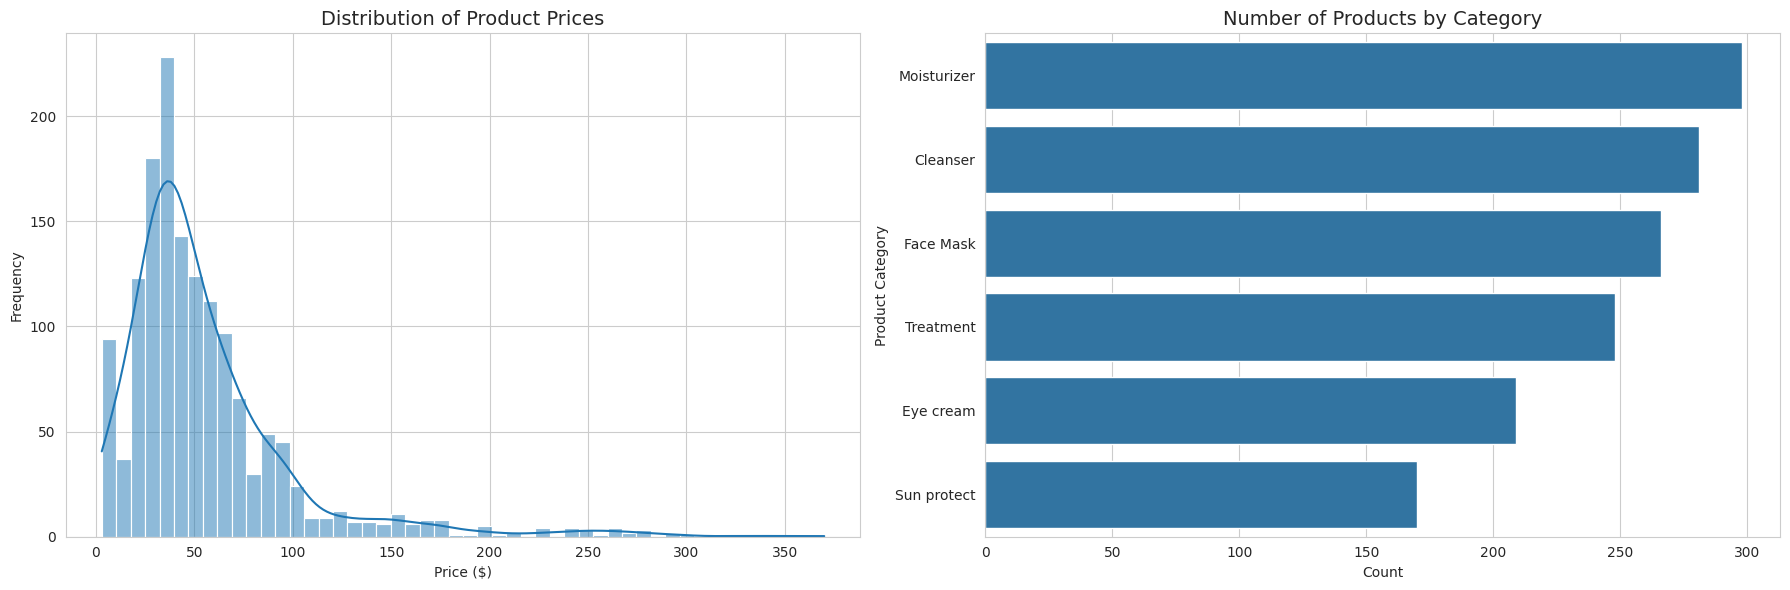

In [7]:
# ==============================================================================
# Step 2: Exploratory Data Analysis (EDA)
# ==============================================================================

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set a visually appealing style for our plots
sns.set_style('whitegrid')

# --- 1. Data Cleaning Checks ---
print("--- Data Cleaning Checks ---")
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Note: Based on df.info(), we know there are no null values. If there were,
# we would handle them here, e.g., df.isnull().sum()

# --- 2. Numerical Feature Analysis ---
print("\n--- Numerical Feature Analysis ---")
# Generate descriptive statistics for numerical columns
# This includes count, mean, std, min, 25%, 50%, 75%, max
print("Descriptive Statistics for Price and Rank:")
display(df[['Price', 'Rank']].describe())

# --- 3. Categorical Feature Analysis ---
print("\n--- Categorical Feature Analysis ---")
# Analyze the distribution of product Labels
print("Distribution of Product Labels:")
label_counts = df['Label'].value_counts()
display(label_counts)

# Analyze the distribution of top 10 Brands
print("\nTop 10 Most Frequent Brands:")
brand_counts = df['Brand'].value_counts().head(10)
display(brand_counts)

# --- 4. Visualization ---
print("\n--- Visualizations ---")

# Create a figure with two subplots, arranged side-by-side
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Distribution of Product Prices
sns.histplot(df['Price'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Distribution of Product Prices', fontsize=14)
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')

# Subplot 2: Count of Products by Label
sns.countplot(y='Label', data=df, order=label_counts.index, ax=axes[1])
axes[1].set_title('Number of Products by Category', fontsize=14)
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Product Category')

# Adjust layout to prevent labels from overlapping and display the plot
plt.tight_layout()
plt.show()

In [9]:
# ==============================================================================
# Step 3 (Corrected): Feature Engineering & Target Variable Preparation
# ==============================================================================

# Import necessary libraries from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import joblib # For saving our trained objects

# --- 1. Define Features (X) and Target (y) ---
X = df['Ingredients']
y = df['Label']

# --- 2. Encode the Target Variable (y) ---
print("--- Encoding Target Variable (Label) ---")
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Shape of encoded target variable:", y_encoded.shape)
print(f"Mapping of first 5 labels: {label_encoder.inverse_transform(y_encoded[:5])}")

# Define the correct file path for saving the encoder
le_save_path = '/content/drive/My Drive/FormulationAgent/label_encoder.joblib'
joblib.dump(label_encoder, le_save_path) # CORRECTED: Using 'FormulationAgent'
print(f"\nLabel encoder saved successfully to: {le_save_path}")


# --- 3. Engineer the Text Features (X) ---
print("\n--- Vectorizing Ingredient Features (TF-IDF) ---")
tfidf_vectorizer = TfidfVectorizer(
    max_features=2000,
    stop_words='english',
    ngram_range=(1, 2)
)
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Define the correct file path for saving the vectorizer
tfidf_save_path = '/content/drive/My Drive/FormulationAgent/tfidf_vectorizer.joblib'
joblib.dump(tfidf_vectorizer, tfidf_save_path) # CORRECTED: Using 'FormulationAgent'
print(f"TF-IDF vectorizer saved successfully to: {tfidf_save_path}")

# --- 4. Verify the Results ---
print("\n--- Verification ---")
print("Shape of the new feature matrix (X_tfidf):", X_tfidf.shape)
print("The data is now ready for model training.")

--- Encoding Target Variable (Label) ---
Shape of encoded target variable: (1472,)
Mapping of first 5 labels: ['Moisturizer' 'Moisturizer' 'Moisturizer' 'Moisturizer' 'Moisturizer']

Label encoder saved successfully to: /content/drive/My Drive/FormulationAgent/label_encoder.joblib

--- Vectorizing Ingredient Features (TF-IDF) ---
TF-IDF vectorizer saved successfully to: /content/drive/My Drive/FormulationAgent/tfidf_vectorizer.joblib

--- Verification ---
Shape of the new feature matrix (X_tfidf): (1472, 2000)
The data is now ready for model training.


--- Splitting data into training (80%) and testing (20%) sets ---
Training set shape: (1177, 2000)
Testing set shape: (295, 2000)

--- Training the RandomForestClassifier ---
Model training complete.
Trained model saved successfully to: /content/drive/My Drive/FormulationAgent/random_forest_model.joblib

--- Evaluating model performance on the test set ---
Model Accuracy: 0.5492

Classification Report:
              precision    recall  f1-score   support

    Cleanser       0.68      0.75      0.71        56
   Eye cream       0.43      0.48      0.45        42
   Face Mask       0.60      0.62      0.61        53
 Moisturizer       0.45      0.53      0.49        60
 Sun protect       0.70      0.56      0.62        34
   Treatment       0.47      0.32      0.38        50

    accuracy                           0.55       295
   macro avg       0.56      0.54      0.54       295
weighted avg       0.55      0.55      0.55       295


--- Visualizing the Confusion Matrix ---


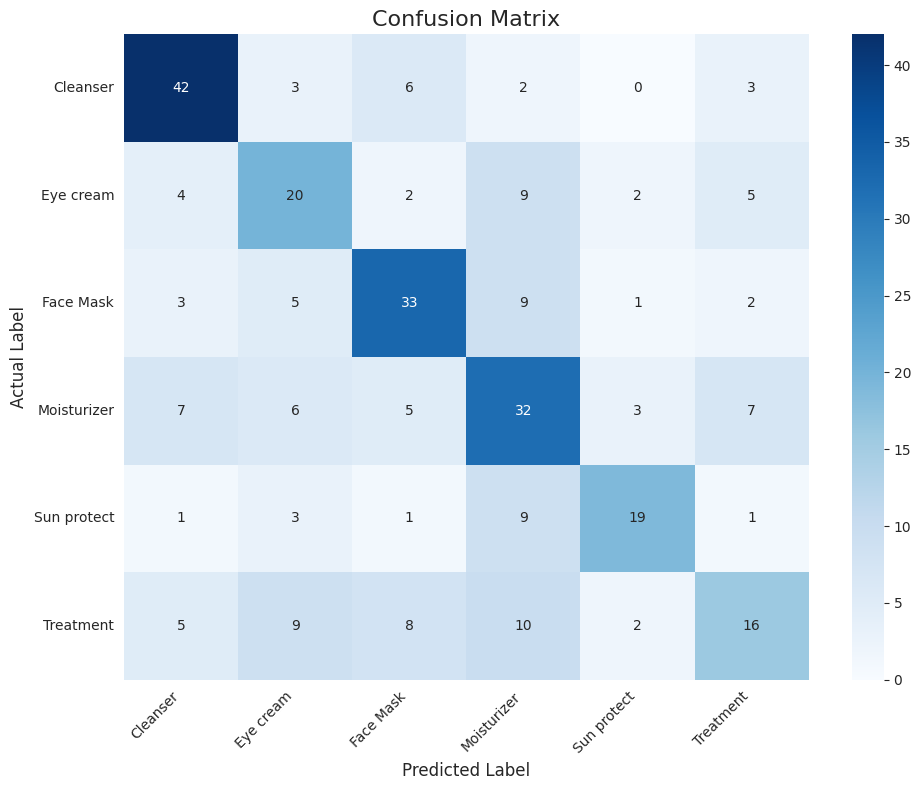

In [10]:
# ==============================================================================
# Step 4: Model Training and Evaluation
# ==============================================================================

# Import necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Split Data into Training and Testing Sets ---
print("--- Splitting data into training (80%) and testing (20%) sets ---")
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,                   # Our ingredient features
    y_encoded,                 # Our encoded product labels
    test_size=0.2,             # Hold out 20% of the data for testing
    random_state=42,           # Ensures the split is the same every time
    stratify=y_encoded         # Ensures same class distribution in train/test sets
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# --- 2. Initialize and Train the Random Forest Model ---
print("\n--- Training the RandomForestClassifier ---")
# We initialize the model with 100 trees and a random state for reproducibility
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train the model on the training data
rf_model.fit(X_train, y_train)
print("Model training complete.")

# --- 3. Save the Trained Model ---
model_save_path = '/content/drive/My Drive/FormulationAgent/random_forest_model.joblib'
joblib.dump(rf_model, model_save_path)
print(f"Trained model saved successfully to: {model_save_path}")

# --- 4. Evaluate the Model on the Test Set ---
print("\n--- Evaluating model performance on the test set ---")
# Make predictions on the unseen test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Display a detailed classification report
print("\nClassification Report:")
# We use the label_encoder to show the original class names in the report
class_names = label_encoder.classes_
print(classification_report(y_test, y_pred, target_names=class_names))

# --- 5. Visualize the Confusion Matrix ---
print("\n--- Visualizing the Confusion Matrix ---")
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap for better interpretation
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()